In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2024-03-27 15:34:12.669717: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-27 15:34:13.499570: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

### Set the number of classes

In [3]:
NUM_CLASSES = 4

### Load training data

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

### Model Construction

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

2024-03-27 15:34:15.416522: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9630 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:41:00.0, compute capability: 8.6


In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1114 (4.35 KB)
Trainable params: 1114 (4.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Early stopping callback
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model Compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Model Training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


2024-03-27 15:34:16.936452: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-03-27 15:34:17.175835: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fdb70351210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-27 15:34:17.175861: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-03-27 15:34:17.180254: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-27 15:34:17.193322: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-03-27 15:34:17.320033: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

14/27 [==============>...............] - ETA: 0s - loss: 1.4386 - accuracy: 0.2946 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
27/27 [==============================] - 2s 13ms/step - loss: 1.3946 - accuracy: 0.3246 - val_loss: 1.2853 - val_accuracy: 0.4479
Epoch 2/1000
16/27 [================>.............] - ETA: 0s - loss: 1.3063 - accuracy: 0.3726
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
27/27 [==============================] - 0s 5ms/step - loss: 1.2893 - accuracy: 0.3882 - val_loss: 1.2059 - val_accuracy: 0.4991
Epoch 3/1000
 1/27 [>.............................] - ETA: 0s - loss: 1.2452 - accuracy: 0.3984

/home/tagglabs/anaconda3/envs/cv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/27 [================>.............] - ETA: 0s - loss: 1.2294 - accuracy: 0.4233
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
27/27 [==============================] - 0s 6ms/step - loss: 1.2233 - accuracy: 0.4201 - val_loss: 1.1277 - val_accuracy: 0.5365
Epoch 4/1000
16/27 [================>.............] - ETA: 0s - loss: 1.1660 - accuracy: 0.4673
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
27/27 [==============================] - 0s 6ms/step - loss: 1.1558 - accuracy: 0.4728 - val_loss: 1.0576 - val_accuracy: 0.6155
Epoch 5/1000
14/27 [==============>...............] - ETA: 0s - loss: 1.1008 - accuracy: 0.5140
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
27/27 [==============================] - 0s 6ms/step - loss: 1.0960 - accuracy: 0.5084 - val_loss: 0.9902 - val_accuracy: 0.6432
Epoch 6/1000
17/27 [=================>............] - ETA: 0s - loss: 1.0654 - accuracy: 0.5165
Epoch 6: savin

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 [==============================] - 0s 5ms/step - loss: 0.2051 - accuracy: 0.9740


In [13]:
# Load the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 107ms/step
[3.6920231e-02 1.3905308e-01 8.2384104e-01 1.8568108e-04]
2


### Confusion Matrix

36/36 [==============================] - 0s 1ms/step


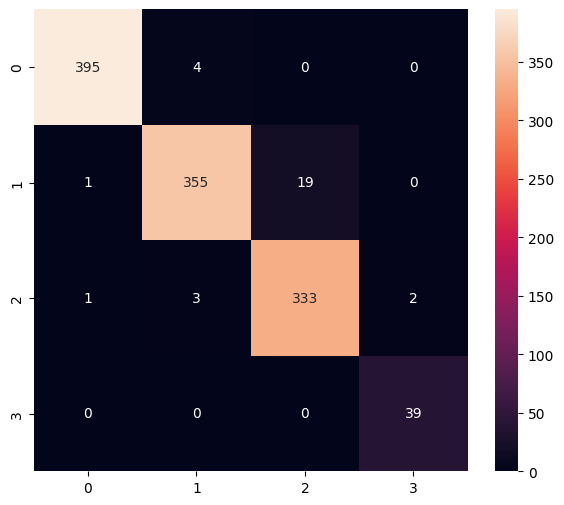

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       399
           1       0.98      0.95      0.96       375
           2       0.95      0.98      0.96       339
           3       0.95      1.00      0.97        39

    accuracy                           0.97      1152
   macro avg       0.97      0.98      0.97      1152
weighted avg       0.97      0.97      0.97      1152



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

### Convert to Tensorflow-Lite model

In [16]:
# Save as an inference-only model
model.save(model_save_path, include_optimizer=False)

/home/tagglabs/anaconda3/envs/cv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Convert the model (quantization)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpojovqvi3/assets


INFO:tensorflow:Assets written to: /tmp/tmpojovqvi3/assets
2024-03-27 15:34:52.207471: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-03-27 15:34:52.207517: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-03-27 15:34:52.207983: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpojovqvi3
2024-03-27 15:34:52.209099: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-03-27 15:34:52.209120: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpojovqvi3
2024-03-27 15:34:52.213133: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2024-03-27 15:34:52.214085: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-03-27 15:34:52.251854: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

6544

### Inference Test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# get input/output tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 761 µs, sys: 121 µs, total: 882 µs
Wall time: 797 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.6920223e-02 1.3905308e-01 8.2384104e-01 1.8568091e-04]
2
